In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = 'D:/EarthMantleConvection/mantle01/spherical001.nc'
netcdf = netCDF4.Dataset(file_path)

In [3]:
netcdf.variables.keys()

dict_keys(['lon', 'r', 'temperature', 'vx', 'vy', 'vz', 'thermal conductivity', 'thermal expansivity', 'temperature anomaly', 'spin transition-induced density anomaly', 'lat'])

<function matplotlib.pyplot.show(close=None, block=None)>

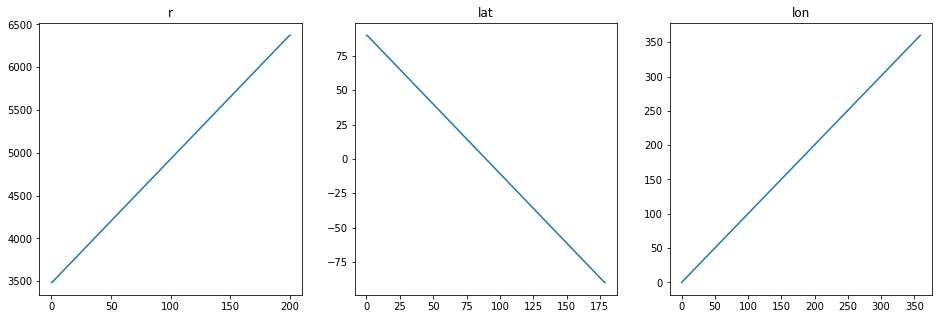

In [4]:
# R 3485km ~ 6371km
# 위도(height) 90 ~ -90
# 경도(width) 0 ~ 360

fig = plt.figure(figsize=(16, 5))
for i, f in enumerate(['r', 'lat', 'lon']):
    ax = fig.add_subplot(1, 3, i+1)
    ax.plot(netcdf[f][:])
    ax.set_title(f)
plt.show

In [5]:
features = ['vx', 'vy', 'vz',
            'temperature', 'temperature anomaly',
            'thermal conductivity', 'thermal expansivity',
            'spin transition-induced density anomaly']

In [6]:
for f in features:
    d = netcdf[f][:]
    print(f"{f}, max: {np.max(d)}, min: {np.min(d)}, mean: {np.mean(d)}, std: {np.std(d)}")

vx, max: 5.700775851380513e-09, min: -3.9670631224453246e-09, mean: 4.742103845017942e-12, std: 3.9322783917938864e-10
vy, max: 5.8211400144614345e-09, min: -4.824658006441496e-09, mean: 1.2611255789662934e-11, std: 4.3129344540204784e-10
vz, max: 7.457672701605134e-09, min: -5.615409026660245e-09, mean: -1.7352695669270446e-11, std: 4.4529371856505406e-10
temperature, max: 3607.34375, min: 293.0, mean: 2209.614501953125, std: 296.6709289550781
temperature anomaly, max: 1105.453369140625, min: -1099.197509765625, mean: 1.8412749767303467, std: 82.32554626464844
thermal conductivity, max: 0.5701583027839661, min: -0.7660495042800903, mean: -0.0008825754630379379, std: 0.0500488243997097
thermal expansivity, max: 8.694364055372716e-07, min: -2.170390416722512e-06, mean: 1.4459429209523478e-09, std: 4.646121709583895e-08
spin transition-induced density anomaly, max: 130.17787170410156, min: -166.5840301513672, mean: 0.14792704582214355, std: 7.314555644989014


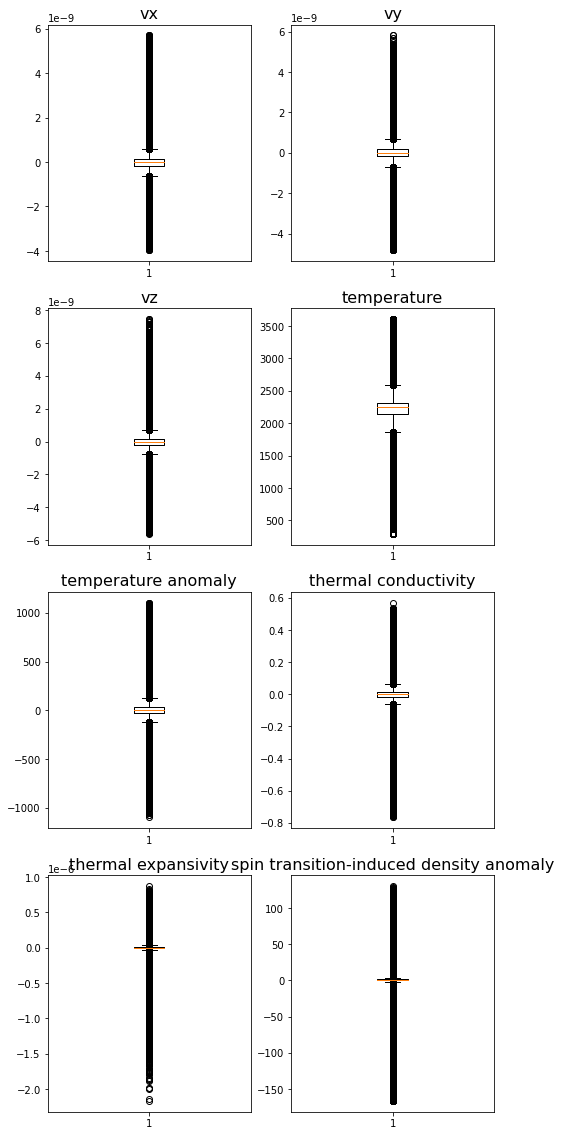

In [7]:
fig = plt.figure(figsize=(8, 20))
for i, f in enumerate(features):
    d = np.array(netcdf[f][:]).flatten()
    ax = fig.add_subplot(4, 2, i+1)
    ax.boxplot(d)
    ax.set_title(f, fontsize=16)    
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

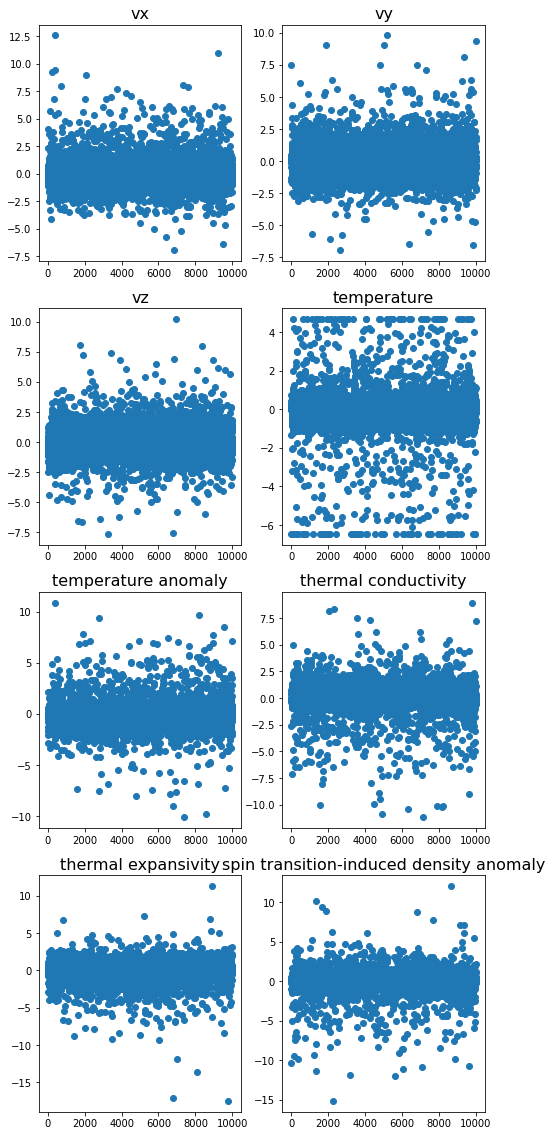

In [9]:
fig = plt.figure(figsize=(8, 20))
for i, f in enumerate(features):
    d = netcdf[f][:]
    x, y, z = d.shape
    d = d.reshape((x*y*z, 1))
    
    sc = StandardScaler()
    sc.fit(d)
    # sc.mean_
    # sc.scale_
    
    res = (d - sc.mean_) / sc.scale_
    # res = sc.transform(d)
    res = res.flatten()
    res = np.random.choice(res, 10000, replace=False)
    ax = fig.add_subplot(4, 2, i+1)
    ax.scatter(range(10000), res)
    ax.set_title(f, fontsize=16) 

plt.show()

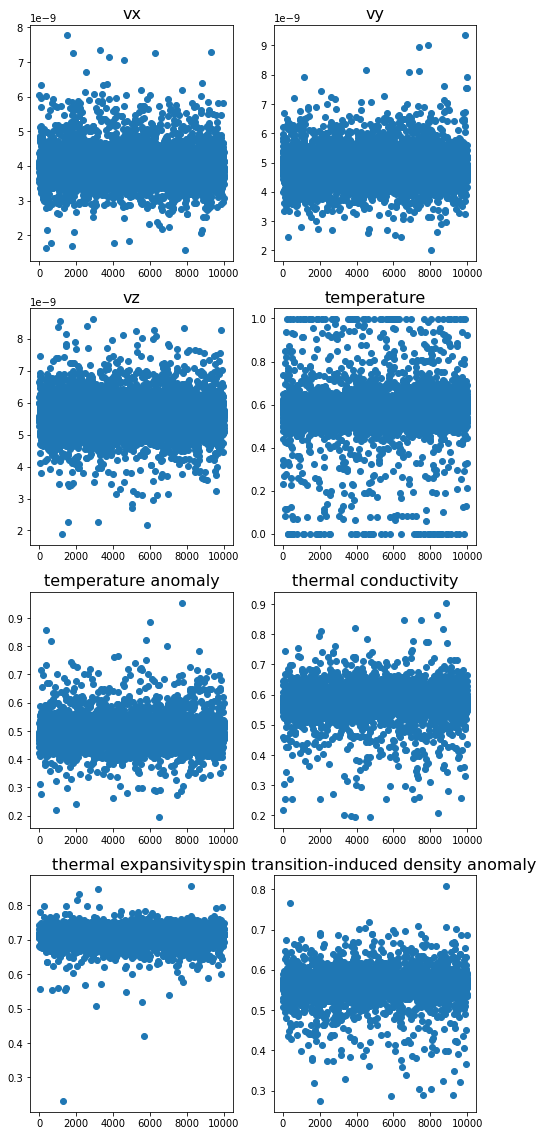

In [10]:
fig = plt.figure(figsize=(8, 20))
for i, f in enumerate(features):
    d = netcdf[f][:]
    x, y, z = d.shape
    d = d.reshape((x*y*z, 1))
    
    sc = MinMaxScaler()
    sc.fit(d)
    # sc.mean_
    # sc.scale_
    
    res = sc.transform(d)
    res = res.flatten()
    res = np.random.choice(res, 10000, replace=False)
    ax = fig.add_subplot(4, 2, i+1)
    ax.scatter(range(10000), res)
    ax.set_title(f, fontsize=16) 

plt.show()